In [46]:
%matplotlib widget
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.rcParams['axes.grid']=True
plt.rcParams['axes.xmargin']=0

In [47]:
# file_path = '../data/CL_experiments/train/inertia13_ki-0.0061-kp-11.8427/2024-10-16--10-57-42_exp  63.csv'
# file_path = '../data/simulated/10_percent/Experiment_2025-01-13_09-03-05.csv'
folder_path = '../data/simulated/50_percent_longer_steps'
exp_number = 6

exp_list = glob.glob(os.path.join(folder_path, '*.csv'))
# print(exp_list)

file_path = exp_list[exp_number]
print(file_path)
df = pd.read_csv(file_path)
# Find the first index where r changes from 0 to 1
# first_non_zero_index = df.index[df['r'].diff().gt(0)].min()
# last_index = df.index[df.t > 20].min()
# df = df.loc[first_non_zero_index:last_index]  # Keep rows up to that index

../data/simulated/50_percent_longer_steps\Experiment_2025-02-02_01-46-42.csv


In [48]:
# df

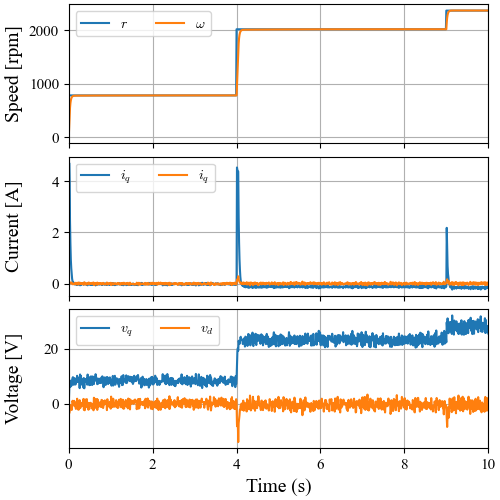

In [49]:
# Create the figure and subplots with shared x-axis
fig, axes = plt.subplots(3, 1, figsize=(5, 5), sharex=True, constrained_layout=True)

axes[2].plot(df.t, df.v_q, label='$v_q$')
axes[2].plot(df.t, df.v_d, label='$v_d$')
axes[2].set_ylabel('Voltage [V]')
axes[2].legend(ncols=2)


axes[1].plot(df.t, df.i_q, label='$i_q$')
axes[1].plot(df.t, df.i_d, label='$i_q$')
axes[1].set_ylabel('Current [A]')
axes[1].legend(ncols=2)

axes[0].plot(df.t, df.r, label='$r$')
axes[0].plot(df.t, df.omega, label=r'$\omega$')
axes[0].set_ylabel('Speed [rpm]')
axes[0].legend(ncols=2)

# Set the x-label for the last subplot
axes[-1].set_xlabel('Time (s)')
# Align the y-axis labels to the left
for ax in axes:
    ax.yaxis.set_label_coords(-0.11, 0.5)  # Adjust -0.1 based on figure width
    ax.legend(loc='upper left', ncol=2)

# Tight layout for better spacing
# plt.xlim([9, 12])
# plt.savefig('experiment.pdf')
plt.show()

In [50]:
import torch